In [225]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# Tubes

In [226]:
length = 10
ring_size = 20
init_tube = []

for i in range(length):
    joint = Qchains.RingGenerater(ring_size)
    joint[:, 2] = i
    init_tube.append(joint)



In [227]:
tube = np.vstack(init_tube)
np.shape(tube)

Qchains.StructurePlotter(tube)

In [228]:
dipole_hatvec = np.array([0, 0, 1])
decay_rate_list = []
most_subradiant_list = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates

for d in distances[1:]:
    eigvals_gyroscope , eigvec_gyroscope = Qchains.FindEigenstates(tube, dipole_hatvec, d)
    decay_rate = 2 * eigvals_gyroscope.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eigvals_gyroscope.real)
    most_subradiant_list.append(subradiant)
    

decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in array')
plt.yscale('log')

KeyboardInterrupt: 

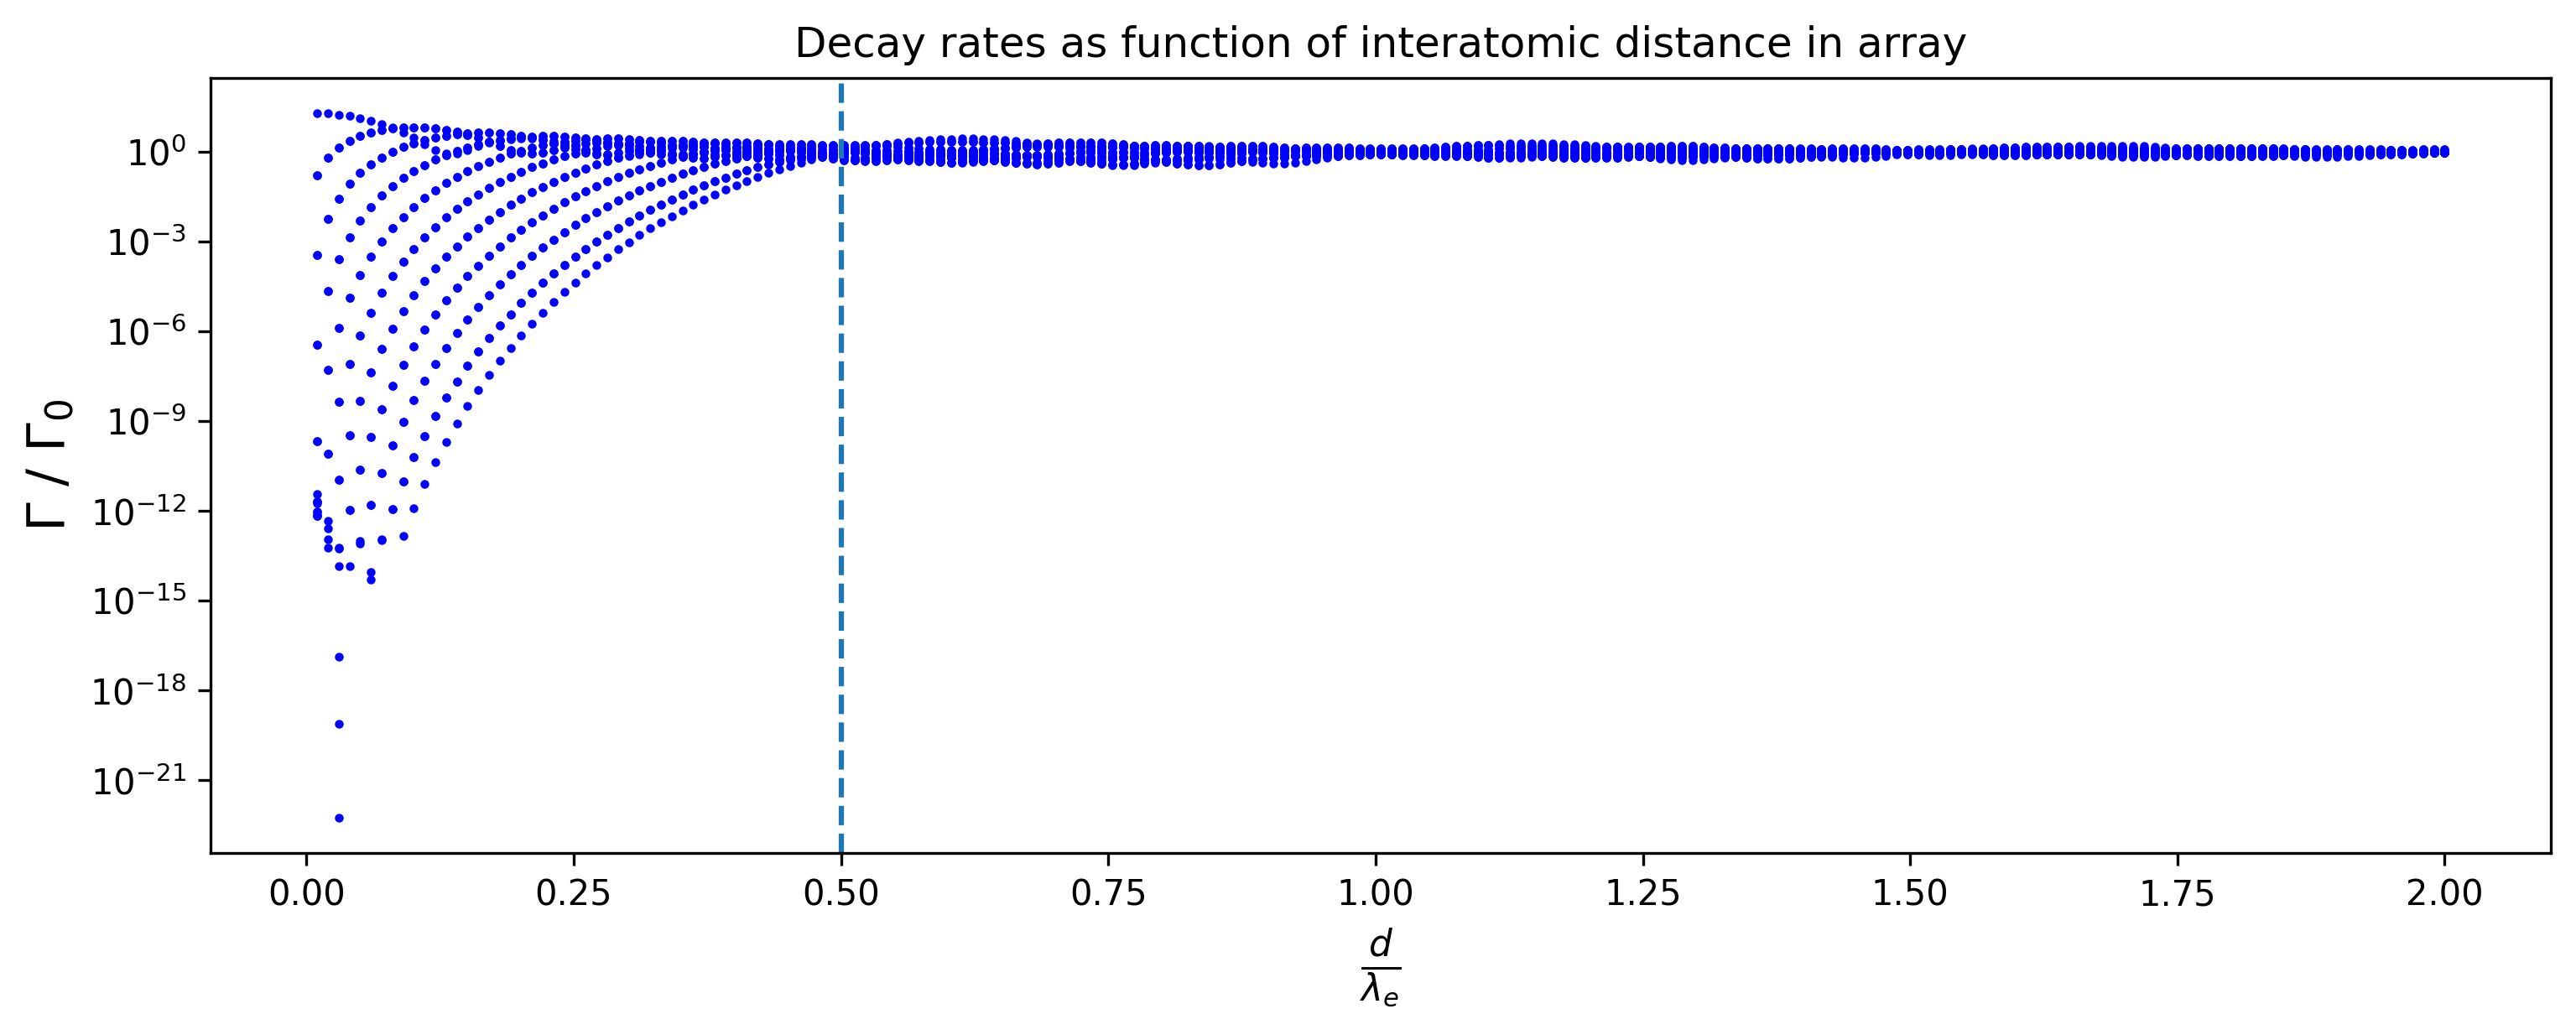

In [ ]:
ring = Qchains.RingGenerater(ring_size)

dipole_hatvec = np.array([0, 0, 1])
decay_rate_list = []
most_subradiant_list = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates

for d in distances[1:]:
    eigvals_gyroscope , eigvec_gyroscope = Qchains.FindEigenstates(ring, dipole_hatvec, d)
    decay_rate = 2 * eigvals_gyroscope.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eigvals_gyroscope.real)
    most_subradiant_list.append(subradiant)
    

decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in array')
plt.yscale('log')

Vary length of tube

In [294]:
tube_length = 80
ring_size = 20
init_tube = []
tube_subradiant_list = []
tube_superradiant_list = []


dipole_vector_hat = np.array([1, 0, 0]) #i x retning 
d = 0.3 

for i in range(tube_length):
    #adds one layer at a time
    joint = Qchains.RingGenerater(ring_size)
    joint[:, 2] = i
    init_tube.append(joint)
    tube = np.vstack(init_tube)
    
    tube_eig_vals_n, tube_eig_vec_n = Qchains.FindEigenstates(tube, dipole_vector_hat, d)
    tube_most_subradiant_decay_rate = - np.max(2 * tube_eig_vals_n.real)
    tube_subradiant_list.append(tube_most_subradiant_decay_rate)
    tube_most_superradiant_decay_rate = - np.min(2 * tube_eig_vals_n.real)
    tube_superradiant_list.append(tube_most_superradiant_decay_rate)

Check om den scaler som $N^{-3}$ da det jo i princippet er linear arrays i den retning. 

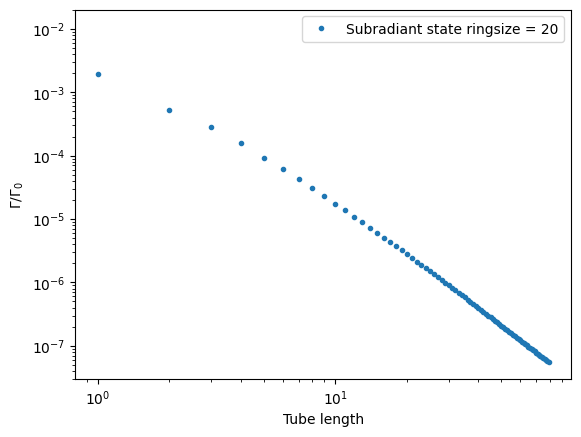

In [295]:
plt.plot(np.arange(tube_length), tube_subradiant_list, '.', label = f'Subradiant state ringsize = {ring_size}')
plt.xlabel('Tube length')
plt.ylabel(r'$\Gamma / \Gamma_0$')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [296]:
superradiant_ring_list = []
N_ring = np.arange(10,1601, 20) 
##For ring# 
for n in N_ring: 
    ring_n = Qchains.RingGenerater(n)
    ring_eig_vals_n, ring_eig_vec_n = Qchains.FindEigenstates(ring_n, dipole_vector_hat, d)
    ring_most_super_radiant_decay_rate = - np.min(2 * ring_eig_vals_n.real)
    superradiant_ring_list.append(ring_most_super_radiant_decay_rate)

In [297]:
superradiant_array_list = []
N_chain = np.arange(10,1601, 20)
#For chain#
for n in N_chain: 
    chain_n = Qchains.ArrayGenerator(n)
    chain_eig_val_n, chain_eig_vec_n = Qchains.FindEigenstates(chain_n, dipole_vector_hat, d)
    chain_most_super_radiant_decay_rate = - np.min(2 * chain_eig_val_n.real)
    superradiant_array_list.append(chain_most_super_radiant_decay_rate)

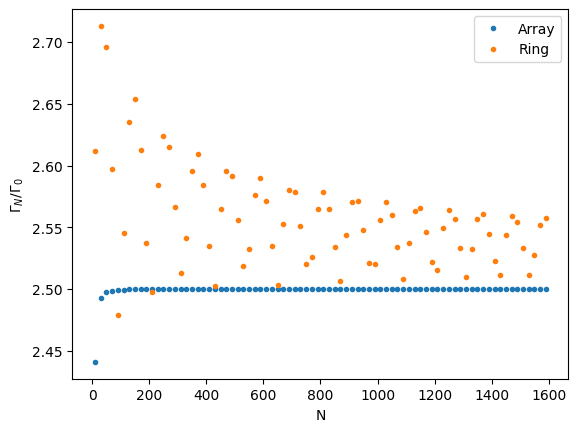

In [298]:
plt.plot(N_chain, superradiant_array_list, '.', label = 'Array')
plt.plot(N_ring, superradiant_ring_list, '.', label = 'Ring')
#plt.plot(np.arange(tube_length) * 20, tube_superradiant_list, '.', label = f'Superradiant state ringsize  {ring_size}')
plt.xlabel('N')
plt.ylabel(r'$\Gamma_N / \Gamma_0$')
plt.legend()

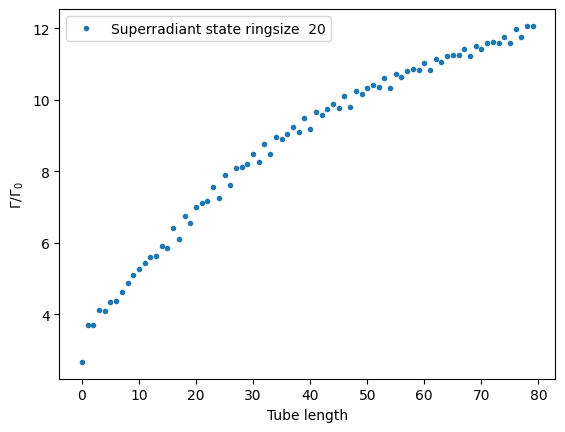

In [299]:
plt.plot(np.arange(tube_length), tube_superradiant_list, '.', label = f'Superradiant state ringsize  {ring_size}')
plt.xlabel('Tube length')
plt.ylabel(r'$\Gamma / \Gamma_0$')
plt.legend()

Text(0.5, 1.0, 'Tube of ringsize 20')

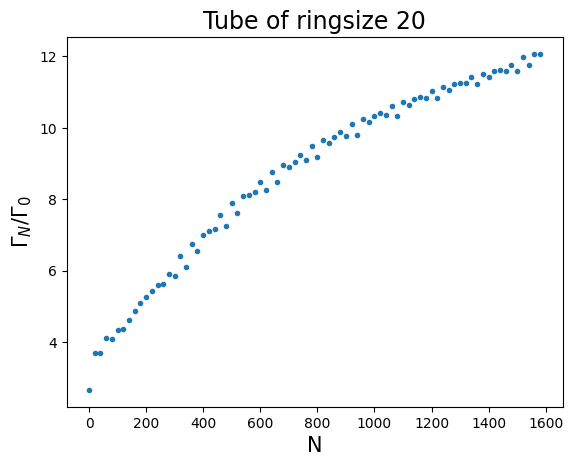

In [300]:
plt.plot(np.arange(tube_length) * 20, tube_superradiant_list, '.')
plt.xlabel(r'N', fontsize = 15)
plt.ylabel(r'$\Gamma_N / \Gamma_0$', fontsize = 15)
plt.title(f'Tube of ringsize {ring_size}', fontsize = 17)

For x polarized we can get almost linear scaling of most superradiant state. 

In [259]:
11**3

1331

In [293]:
size = 10
superradiant_cube_list = []
# Generate the 3D grid of coordinates
for i in range(1, size + 1): 
    x, y, z = np.meshgrid(np.arange(i), np.arange(i), np.arange(i), indexing='ij')
    lattice_points = np.stack((x, y, z), axis=-1).reshape(-1, 3)    
    eigval_cube, eigvec_cube = Qchains.FindEigenstates(lattice_points, dipole_vector_hat, d)
    super_radiant_state = -np.min(2 * eigval_cube.real)
    superradiant_cube_list.append(super_radiant_state)

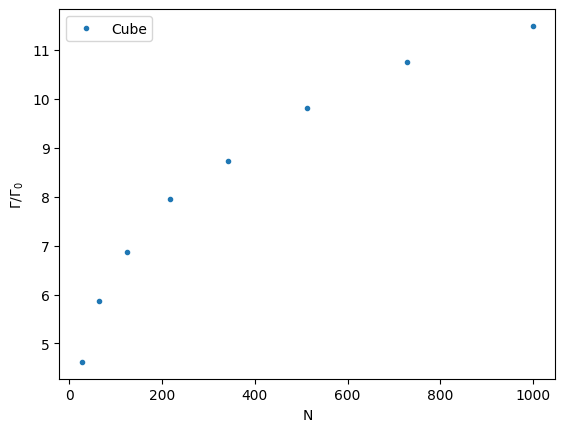

In [278]:
plt.plot(np.arange(3, size + 1)**3, superradiant_cube_list[2:],  '.', label = 'Cube')
plt.xlabel('N')
plt.ylabel(r'$\Gamma / \Gamma_0$')
plt.legend();

### Scaling with number of ring size

In [ ]:
tube_length = 20
ring_size = 70
init_tube = []
tube_subradiant_list_ringsize = []
tube_superradiant_list_ringsize = []

dipole_vector_hat = np.array([0, 0, 1]) #i z retning 
d = 0.3 


for j in range(3, ring_size, 2): 
    init_tube = []
    for i in range(tube_length):
        #adds one layer at a time
        joint = Qchains.RingGenerater(j)
        joint[:, 2] = i + j * tube_length
        init_tube.append(joint)

    tube_n = np.vstack(init_tube)

    tube_eig_vals_n, tube_eig_vec_n = Qchains.FindEigenstates(tube_n, dipole_vector_hat, d)
    tube_most_subradiant_decay_rate = - np.max(2 * tube_eig_vals_n.real)
    tube_subradiant_list_ringsize.append(tube_most_subradiant_decay_rate)
    tube_most_superradiant_decay_rate = - np.min(2 * tube_eig_vals_n.real)
    tube_superradiant_list_ringsize.append(tube_most_superradiant_decay_rate)

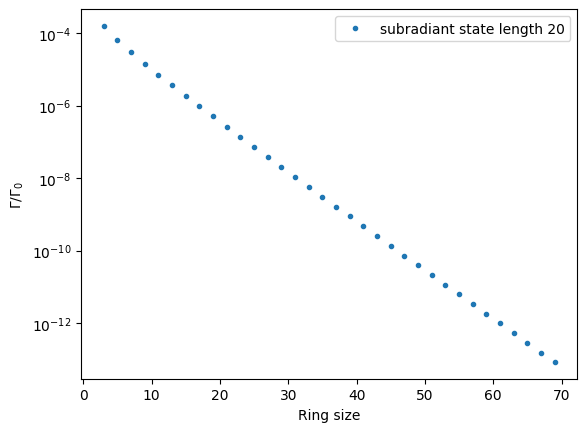

In [ ]:
plt.plot(np.arange(3, ring_size, 2), tube_subradiant_list_ringsize, '.', label = f'subradiant state length {tube_length}')
plt.xlabel('Ring size')
plt.ylabel(r'$\Gamma / \Gamma_0$')
plt.yscale('log')
plt.legend()

## Funnel

In [ ]:
tube_length = 2
ring_size = 20
init_tube = []
tube_subradiant_list = []
tube_superradiant_list = []


dipole_vector_hat = np.array([1, 0, 0]) #i z retning 
d = 0.3 

for j in range(3, ring_size): 
    for i in range(tube_length):
        #adds one layer at a time
        joint = Qchains.RingGenerater(j)
        joint[:, 2] = i + j * tube_length
        init_tube.append(joint)

    funnel = np.vstack(init_tube)
Qchains.StructurePlotter(funnel)

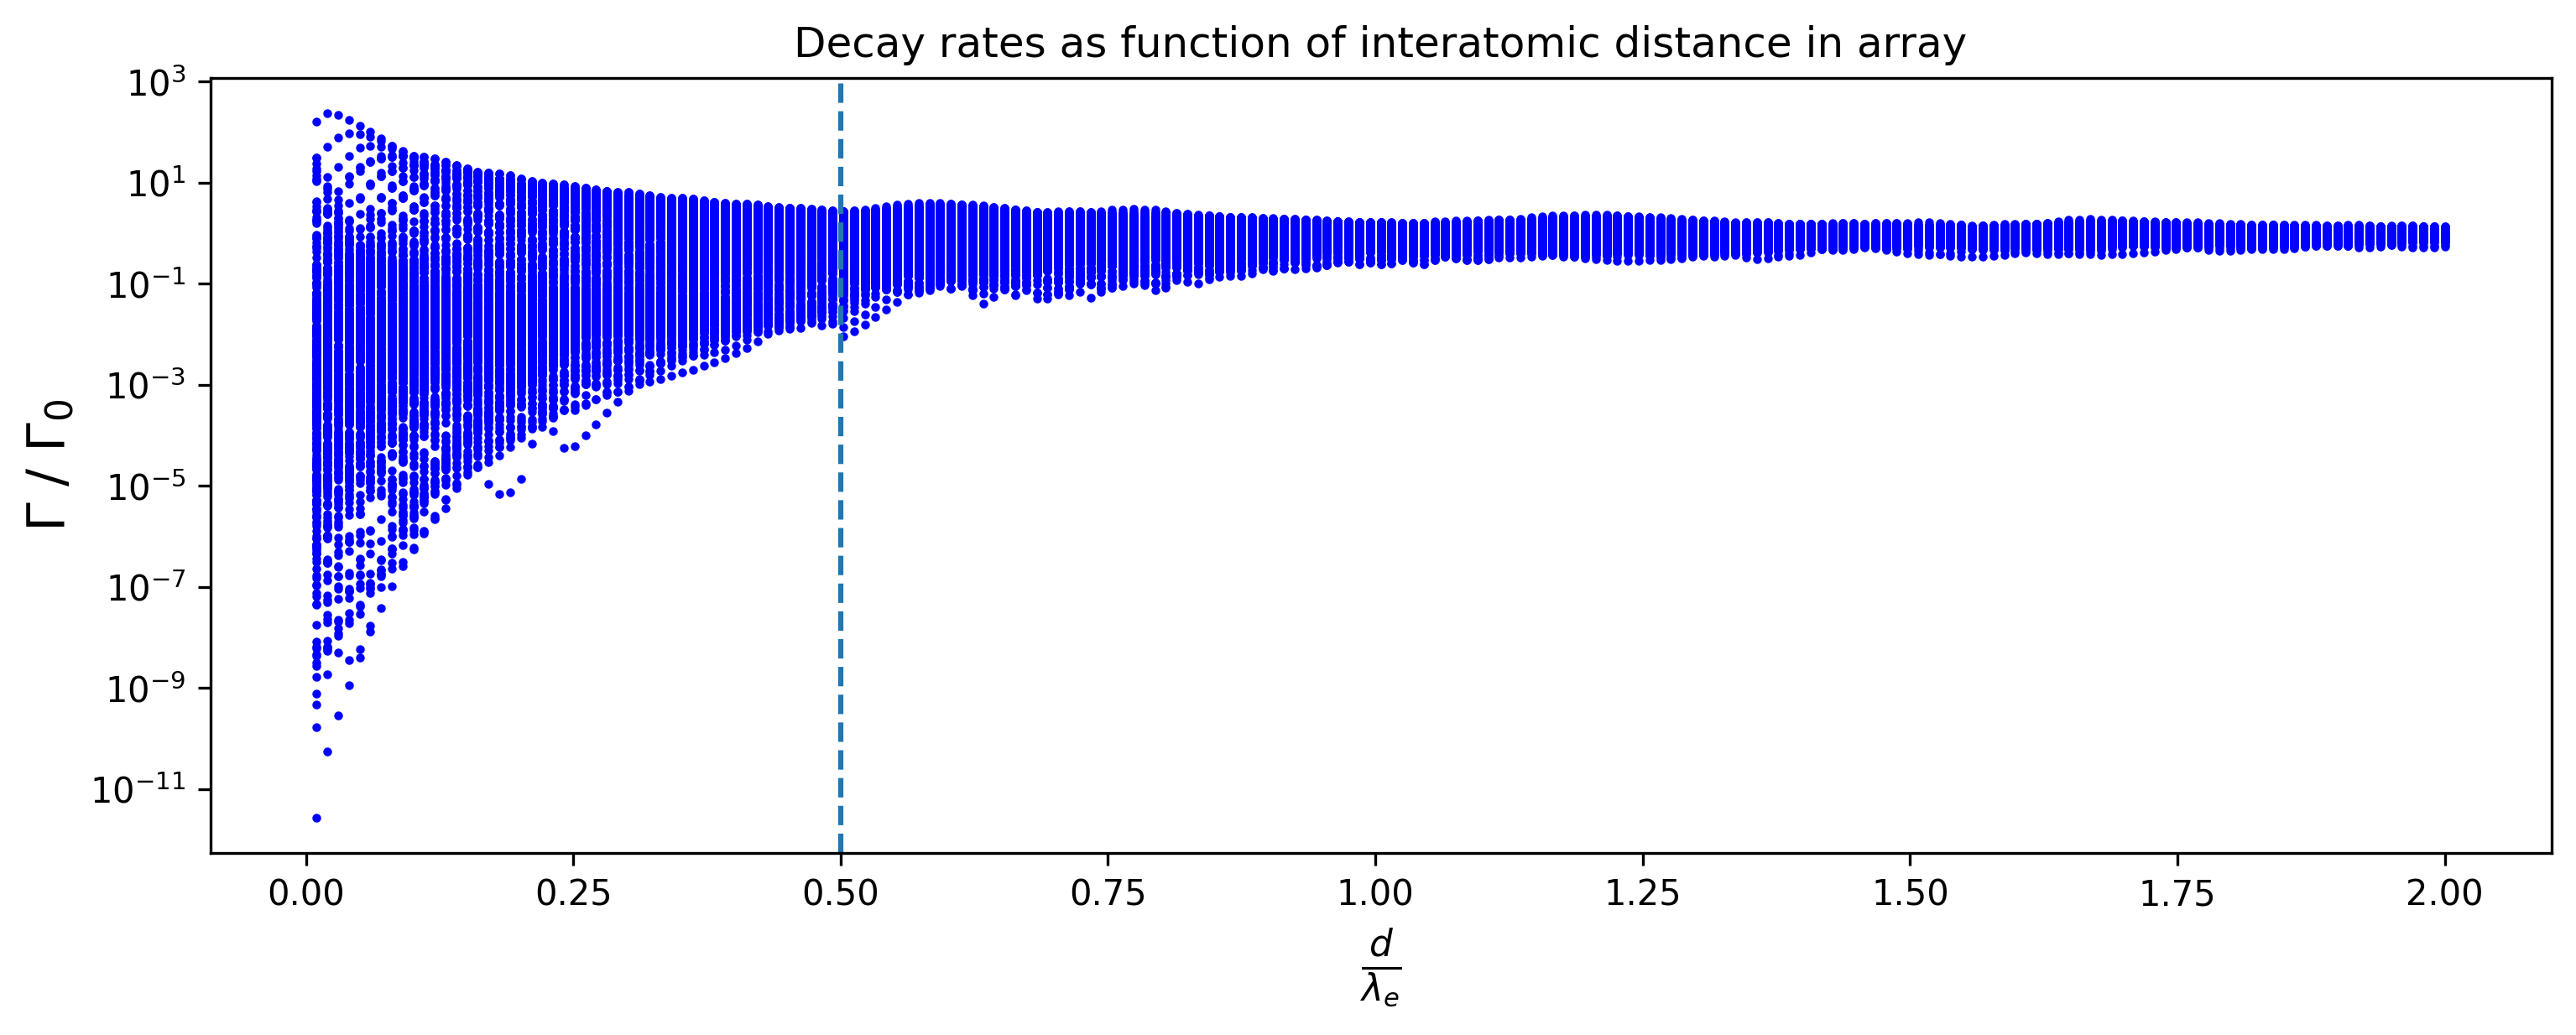

In [ ]:
dipole_hatvec = np.array([0, 0, 1])
decay_rate_list = []
most_subradiant_list = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates

for d in distances[1:]:
    eigvals_gyroscope , eigvec_gyroscope = Qchains.FindEigenstates(funnel, dipole_hatvec, d)
    decay_rate = 2 * eigvals_gyroscope.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eigvals_gyroscope.real)
    most_subradiant_list.append(subradiant)
    

decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in array')
plt.yscale('log')